In [ ]:
 import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/diamonds.csv')

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.drop(["Unnamed: 0"],axis = 1 ,inplace= True)

In [ ]:
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#dropping dimensionless diamonds
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

In [ ]:
#Dropping the outliers.
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 10)

In [ ]:
# Get list of categorical variables
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
# Make copy to avoid changing original data
label_data = df.copy()

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# **outlier detection**

Text(0.5, 1.0, 'Boxplot cut')

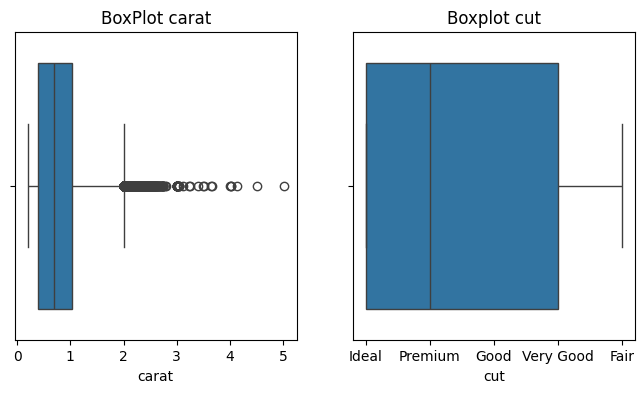

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.boxplot(data = df,ax=axes[0], x='carat')
axes[0].set_title('BoxPlot carat')

sns.boxplot(data = df,ax=axes[1], x= 'cut')
axes[1].set_title('Boxplot cut')

In [ ]:
quant=df['carat'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    1.04
0.25    0.40
Name: carat, dtype: float64
1.04
0.4
0.64
2.0
-0.5599999999999999


<Axes: ylabel='carat'>

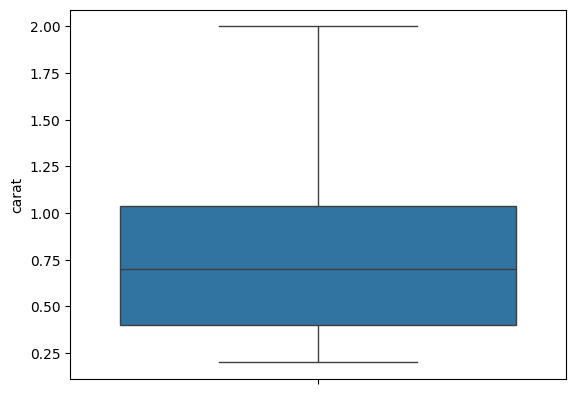

In [ ]:
df['carat']=np.where(df['carat']>2.0,2.0,df['carat'])
sns.boxplot(df['carat'])

Text(0.5, 1.0, 'Boxplot  table')

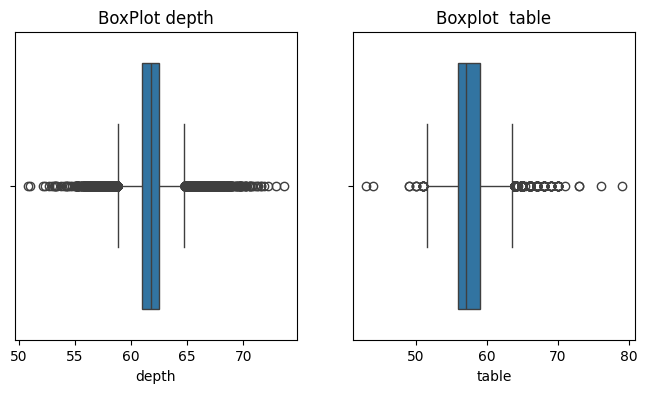

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.boxplot(data = df,ax=axes[0], x='depth')
axes[0].set_title('BoxPlot depth')

sns.boxplot(data = df,ax=axes[1], x= 'table')
axes[1].set_title('Boxplot  table')

In [ ]:
quant=df['depth'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    62.5
0.25    61.0
Name: depth, dtype: float64
62.5
61.0
1.5
64.75
58.75


<Axes: ylabel='depth'>

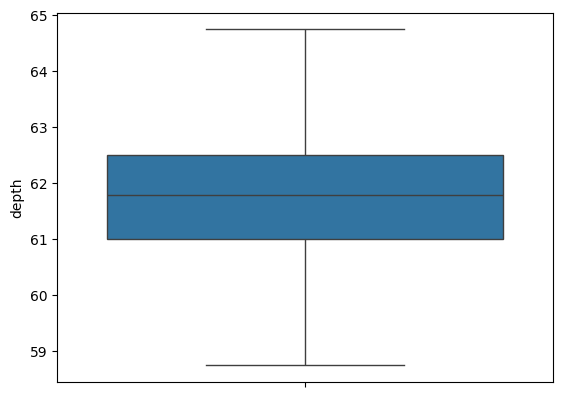

In [ ]:
df['depth']=np.where(df['depth']>64.75,64.75,df['depth'])
df['depth']=np.where(df['depth']<58.75,58.75,df['depth'])
sns.boxplot(df['depth'])

In [ ]:
quant=df['table'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
minwhisker=Q1-1.5*IQR
print(minwhisker)

0.75    59.0
0.25    56.0
Name: table, dtype: float64
59.0
56.0
3.0
63.5
51.5


<Axes: ylabel='table'>

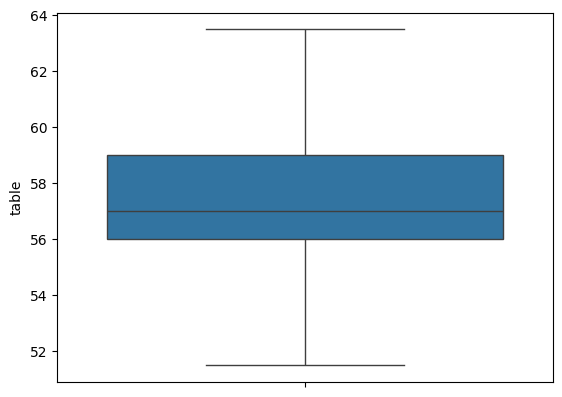

In [ ]:
df['table']=np.where(df['table']>63.5,63.5,df['table'])
df['table']=np.where(df['table']<51.5,51.5,df['table'])
sns.boxplot(df['table'])

# **univariate analysis**

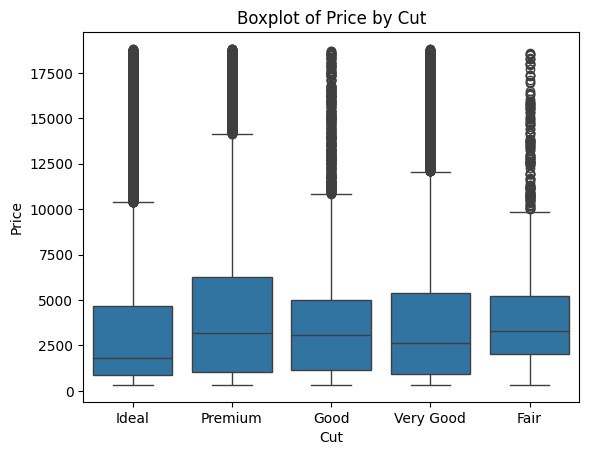

In [ ]:
# Boxplot for cut
sns.boxplot(x=df["cut"], y=df["price"])
plt.xlabel("Cut")
plt.ylabel("Price")
plt.title("Boxplot of Price by Cut")
plt.show()

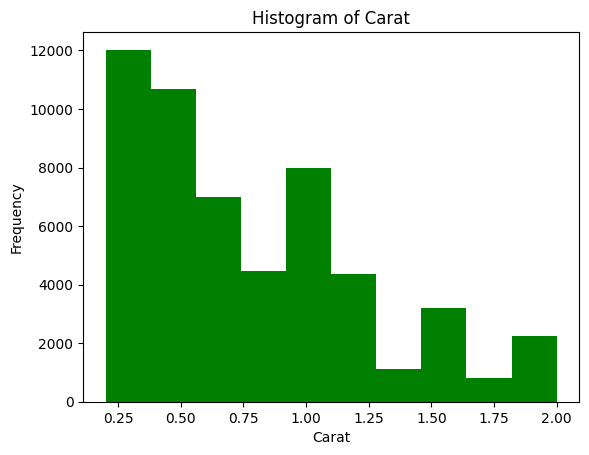

In [ ]:

import matplotlib.pyplot as plt
# Histogram for carat
plt.hist(df["carat"], bins=10,color='g')
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.title("Histogram of Carat")
plt.show()

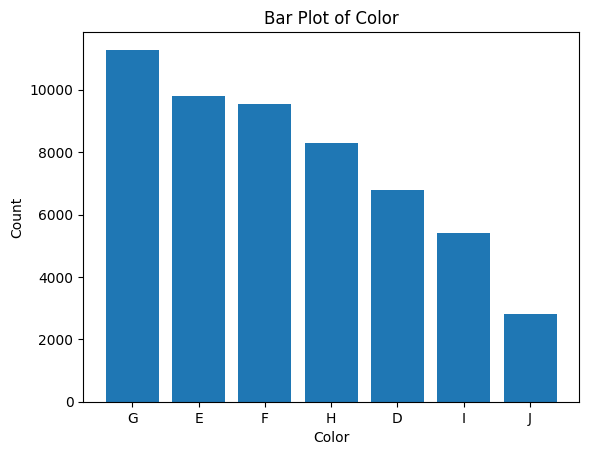

In [ ]:

# Bar plot for color
color_counts = df["color"].value_counts()
plt.bar(color_counts.index, color_counts.values)
plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Bar Plot of Color")
plt.show()

# **Bivariate analysis**

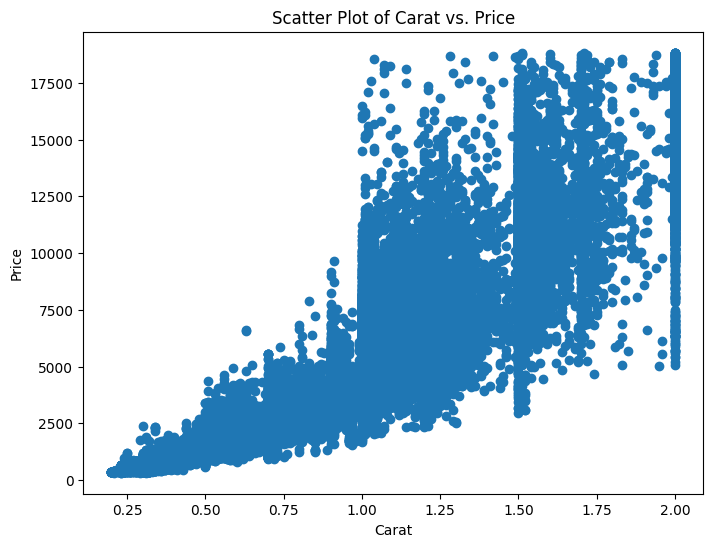

In [ ]:
# Create a scatter plot of carat vs. price
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs. Price')
plt.show()

# **Multivariate analysis**

<Axes: >

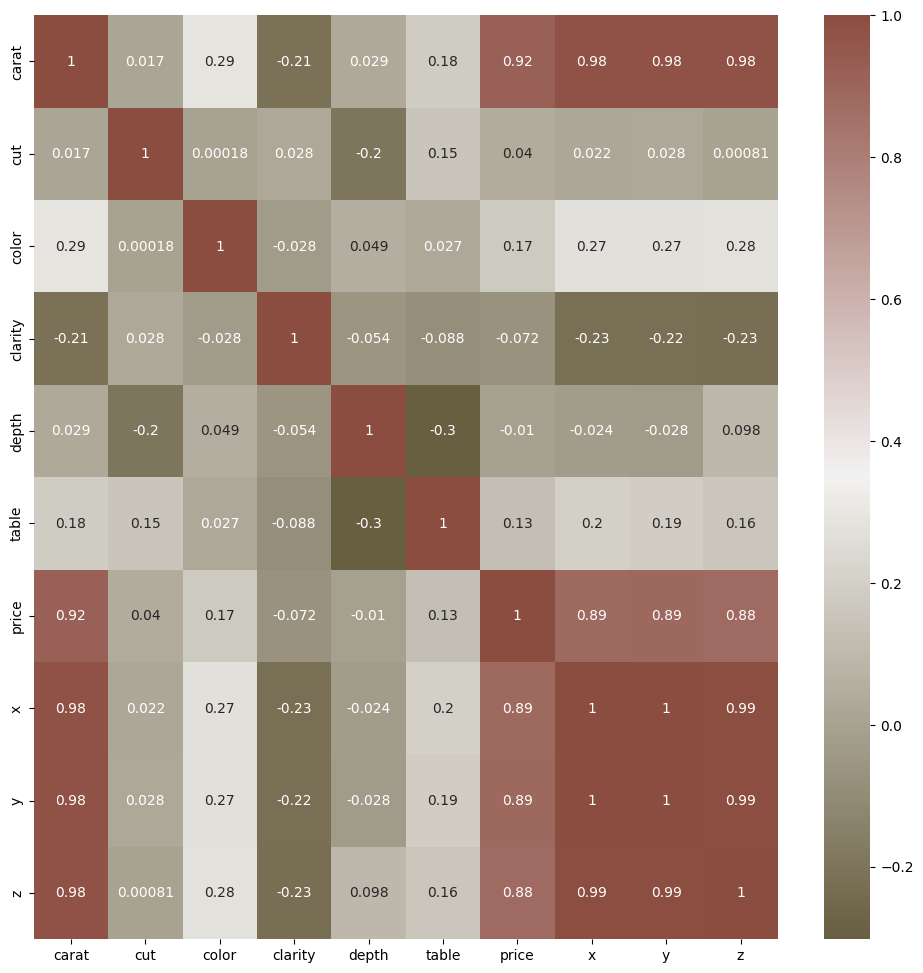

In [ ]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

MODEL BUILDING

In [ ]:
# Assigning the featurs as X and trarget as y
X= label_data.drop(["price"],axis =1)
y= label_data["price"]

# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score # Import cross_val_score

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1348.811824 
DecisionTree: -754.975651 
RandomForest: -549.016375 
KNeighbors: -823.648809 
XGBRegressor: -547.645088 


In [ ]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [ ]:
# Model Evaluation
from sklearn import metrics # Import the metrics module
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9803842673897721
Adjusted R^2: 0.9803711581899881
MAE: 280.1733446465832
MSE: 307728.16599314264
RMSE: 554.7325175191577


In [ ]:
pred = pipeline_lr.predict(X_test)

In [ ]:

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.8890105065854332
Adjusted R^2: 0.888936332274842
MAE: 849.3507396470707
MSE: 1741183.667805709
RMSE: 1319.5391876733745


In [ ]:
pred = pipeline_rf.predict(X_test)

In [ ]:

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9808941912929494
Adjusted R^2: 0.9808814228754575
MAE: 270.8375343442267
MSE: 299728.56941223267
RMSE: 547.4747203407959


In [ ]:
pred = pipeline_dt.predict(X_test)

In [ ]:

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9649108687982553
Adjusted R^2: 0.9648874187217115
MAE: 357.59824144839354
MSE: 550472.1238591674
RMSE: 741.9380862707935


In [ ]:
pred = pipeline_kn.predict(X_test)

In [ ]:
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9599378014423691
Adjusted R^2: 0.9599110278634712
MAE: 402.92807004526225
MSE: 628488.7305898939
RMSE: 792.7728114598116


In [ ]:
X


,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [ ]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53907, dtype: int64

In [ ]:
x_input=[[0.23,2,1,3,61.5,55.0,3.95,3.98,	2.43]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[295.18884]


In [ ]:
x_input=[[	0.32,	3,	4	,7	,62.2,	58.0,	4.33,	4.38,	2.71]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[679.8251]


In [ ]:
x_input=[[	0.32,	4,	3,7	,65.2,	58.0,	4.33,	4.38,	2.89]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[869.6524]


In [ ]:
y_input=[[	0.32,	4,	3,7	,65.2,	58.0,	4.33,	4.38,	2.89]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[869.6524]


In [ ]:
x_input=[[	1.3,	4,	3.11,7.3	,63.2,	54.9,	4.33,	4.38,	2.89]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[5764.6704]


In [ ]:
x_input=[[	0.23,2,1,3,61.5,55.0,3.95,3.98,2.43]]
Prediction=pipeline_xgb.predict(x_input)
print(Prediction)

[295.18884]


In [ ]:
import pickle
# Assuming 'pipeline_xgb' contains your trained XGBoost model
xgboost_model = pipeline_xgb
pickle.dump(xgboost_model, open('music_model.pkl','wb'))